In [16]:
import shelve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import statistics
from scipy.stats import skew 
from scipy.stats import ttest_ind
import math as m
import scipy.stats as st
plt.style.use('seaborn')
plt.style.use('seaborn-talk')
plt.style.use('seaborn-talk')

Here are the parallel numpy arrays, parallel in the sense that they all have the same number of rows, equal to the number of trials (202).

In [10]:
N = len(Y)

In [9]:
# SINGULAR VALUE entry rows

# 'Y's 
Y  # 1 or 0 for correct vs incorrect

# X's 
X_words  # number identifier of the word (corresponds to index of total_word_list)
X_wordlengths  # length of the word (either 5 or 6)
X_par  # participant ID number (1 through 29)
X_seqlengths # the length of the letter sequence data  
X_timelengths # the number of seconds of each trial
X_propvowel # the proportion of the letter sequence data that was vowels

X_loc_all # the average location as a percentage of the way through for each category of bigram
X_loc_first
X_loc_second
X_loc_third
X_loc_fourth
X_loc_final


# ARRAY entry rows
# (each entry represents an anagram scenario)
X_letterseq # letter sequence data (sub L)
X_vowels # vowel sequence data 1 if vowel, otherwise 0 (sub L)
X_order # number representing the number letter in the word (sub L)
X_position # the position on the screen - middle left clockwise (sub L)


X_direction # 1 if clockwise adjacent, - 1 if counterclockwise adjacent, (similar story for 2),
            # for six-letter words, 3 if moving to letter three spots away (no difference c vs cc)
# sub X_direction
X_direction_abs # absolute value of X_direction, just gives how far is the movement, no direction
X_direction_abs_ones # 1 if 1 in X_direction_abs, else 0. Just gives whether moving 1 away.

X_ones  # 1 for each in-sequence (in the word) letter to letter read, else 0. (sub L - 1)
# sub X_ones
X_ones_first # (sub L - 1)
X_ones_second # (sub L - 1)
X_ones_third # (sub L - 1)
X_ones_fourth # (sub L - 1)
X_ones_final

X_bigrams  # each bigram read by the participant. (sub L - 1)
X_trigrams # (sub L - 2)
X_fourgrams # (sub L - 3)
X_fivegrams # (sub L - 4)


# miscellaneous, gives the number of bigrams for each category of bigram
first_sizes
second_sizes
third_sizes
fourth_sizes
final_sizes
all_sizes

In [255]:
# sub length L arrays
for i in range(N):
    assert(X_seqlengths[i] == len(X_letterseq[i]) == len(X_vowels[i]) == \
           len(X_order[i]) == len(X_position[i]))

# sub length L - 1 arrays (like bigrams)
for i in range(N):
    assert(len(X_ones[i]) == len(X_ones_first[i]) == len(X_ones_final[i]) == \
           len(X_bigrams[i]) == len(X_direction[i]) == len(X_direction_abs[i]) == \
           len(X_direction_abs_ones[i]))


## In-word bigrams average locations

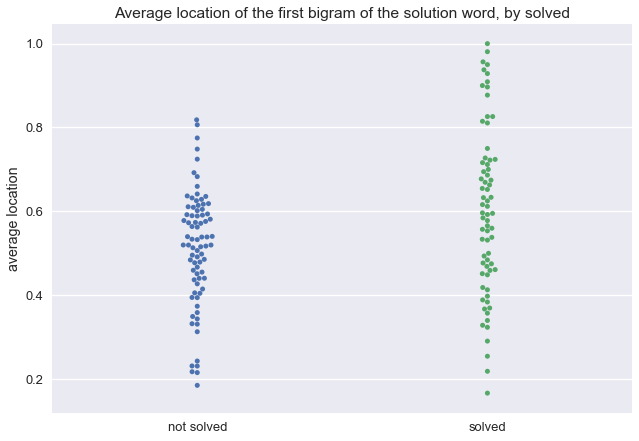

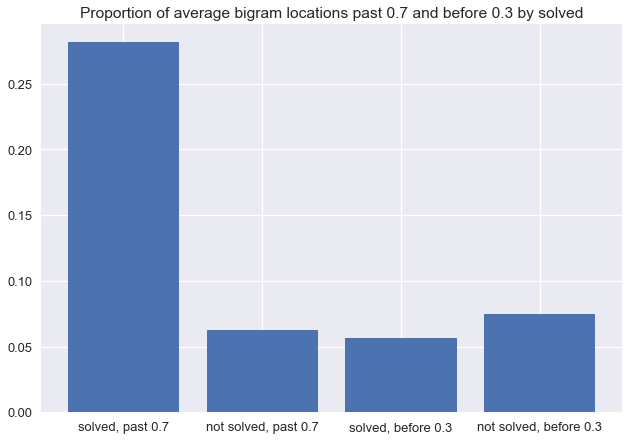

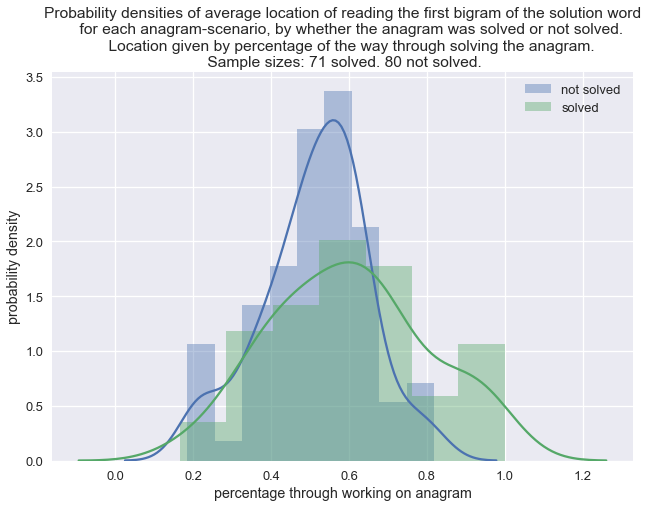

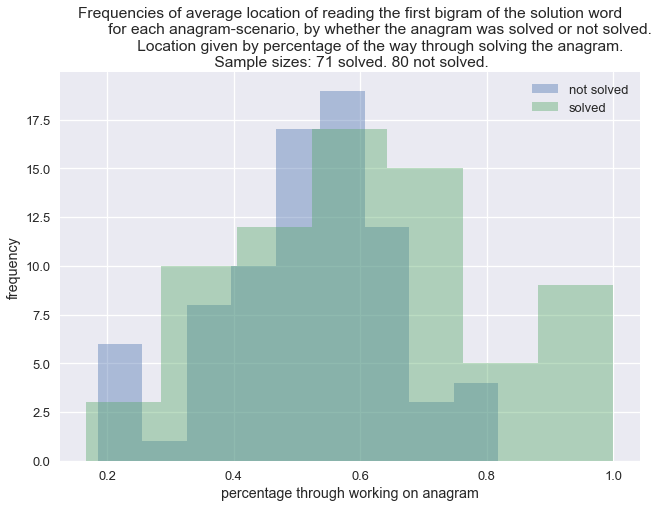

FOR NOT SOLVED
Average 0.5135866235940603
Median 0.5262162420992147
St.Dev 0.13635711777453252
Skewness -0.3503290340016885

Average number of ones: 7.1

FOR SOLVED
Average 0.6011514480807448
Median 0.5952380952380952
St.Dev 0.19962668686504115
Skewness 0.118584604768657

Average number of ones: 3.408450704225352


In [114]:
first = give_info_locs(X_loc_first, first_sizes, 'the first')

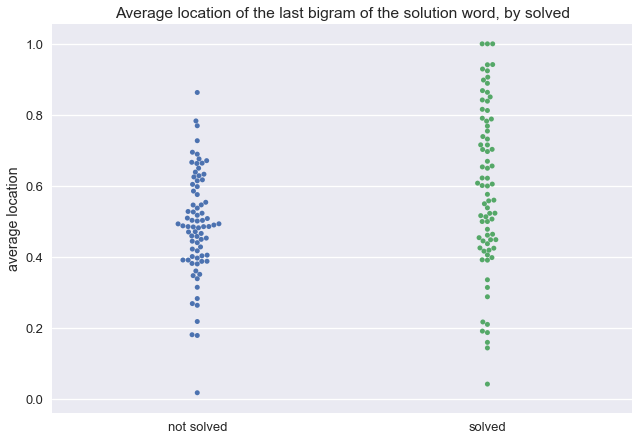

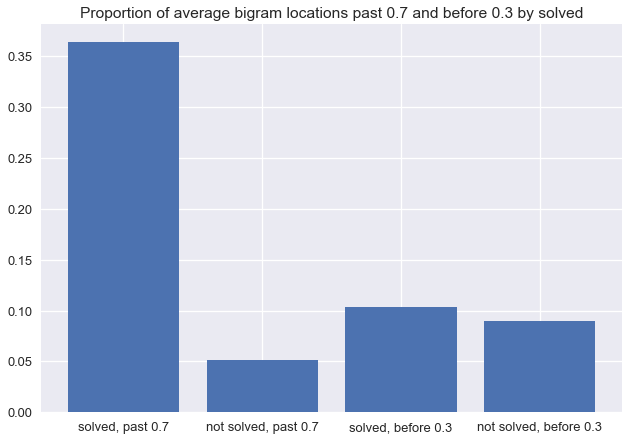

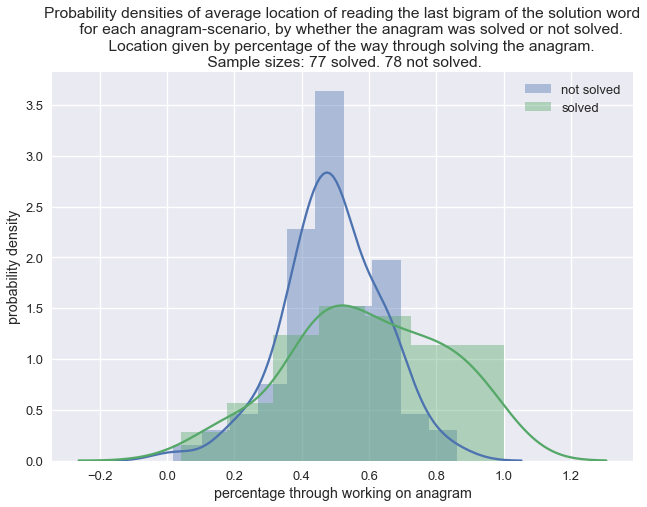

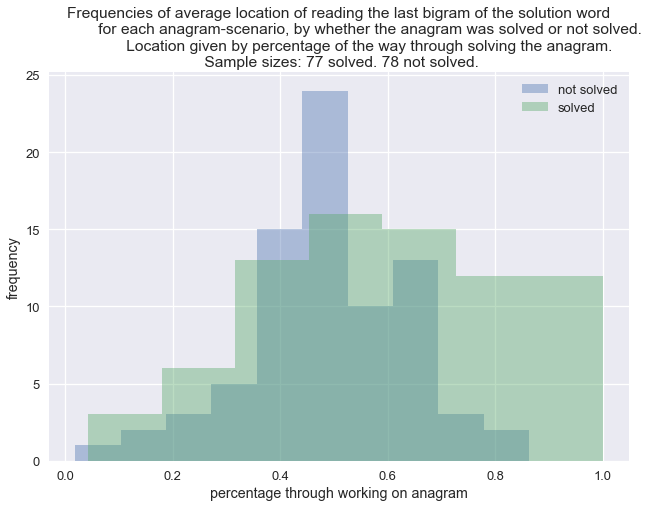

FOR NOT SOLVED
Average 0.49078340563528927
Median 0.4869142415890906
St.Dev 0.14673207827902424
Skewness -0.2666247821882029

Average number of ones: 6.102564102564102

FOR SOLVED
Average 0.5957685356971487
Median 0.6
St.Dev 0.22916917160504366
Skewness -0.16788458181308602

Average number of ones: 2.9740259740259742


In [95]:
last = give_info_locs(X_loc_final, final_sizes, 'the last')

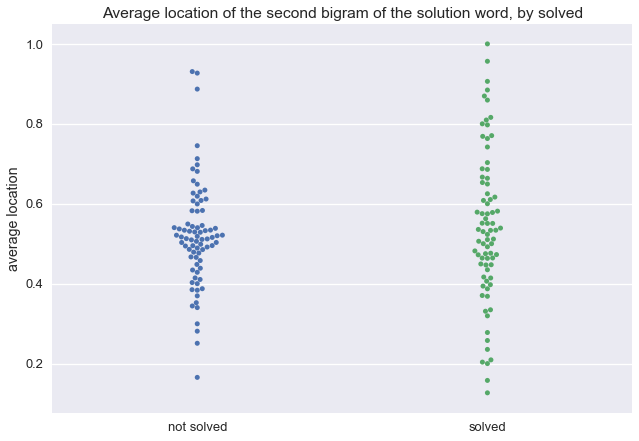

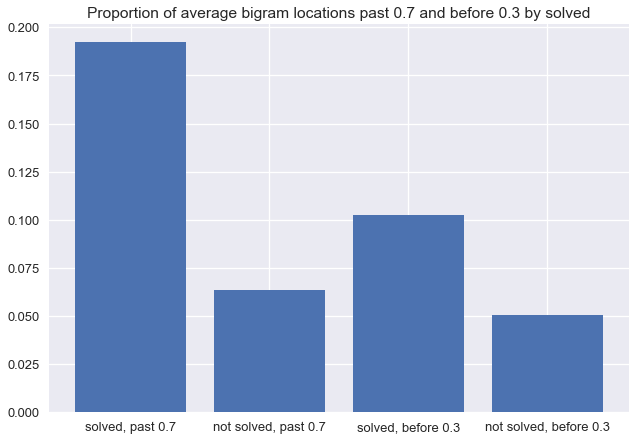

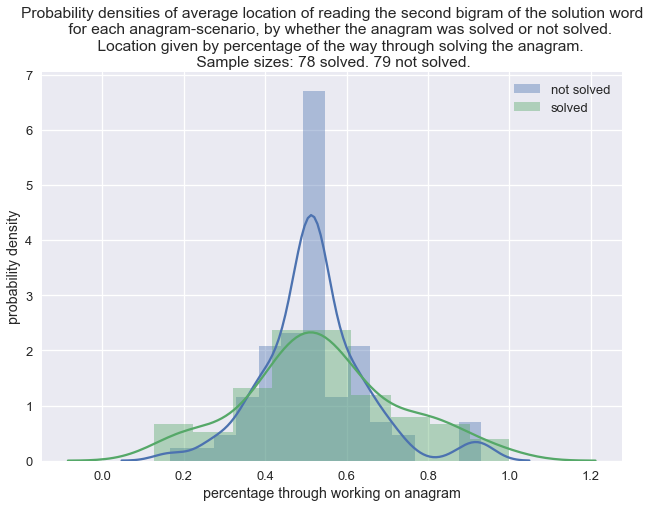

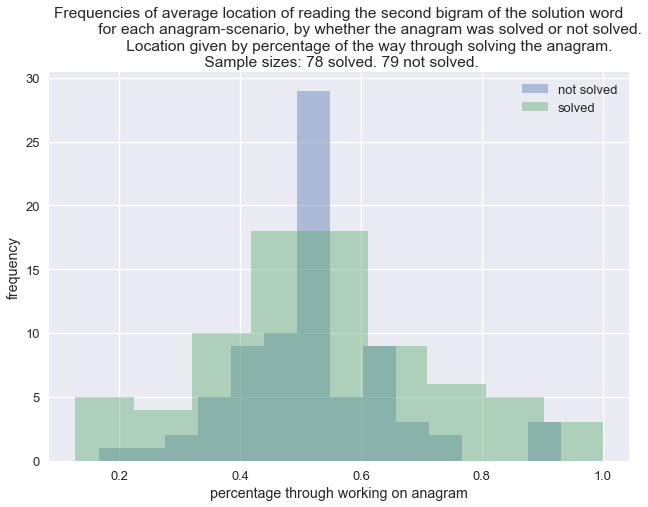

FOR NOT SOLVED
Average 0.5206203539452217
Median 0.5157232704402516
St.Dev 0.13115675313875994
Skewness 0.6039200658566486

Average number of ones: 7.8734177215189876

FOR SOLVED
Average 0.5408907117038654
Median 0.5318181818181817
St.Dev 0.18978136905238163
Skewness 0.1713267702300143

Average number of ones: 4.4743589743589745


In [96]:
second = give_info_locs(X_loc_second, second_sizes,'the second')

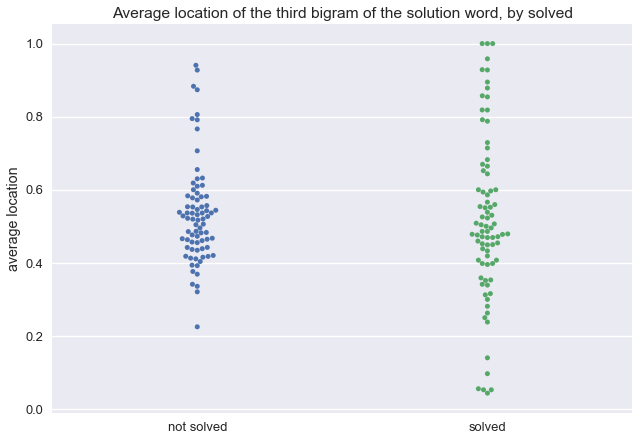

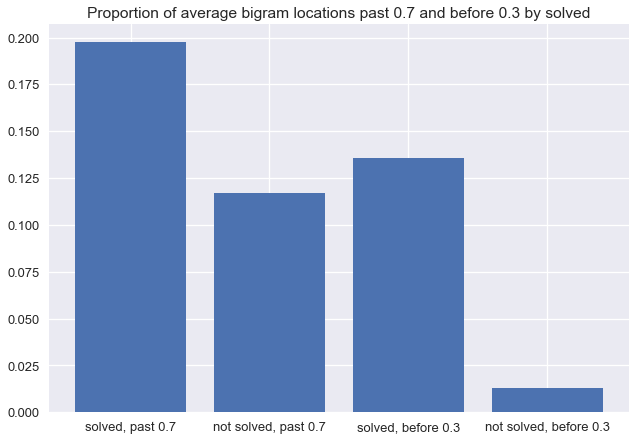

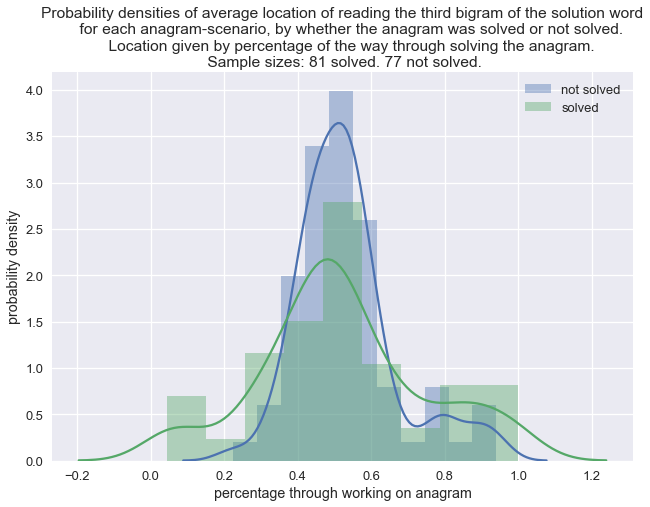

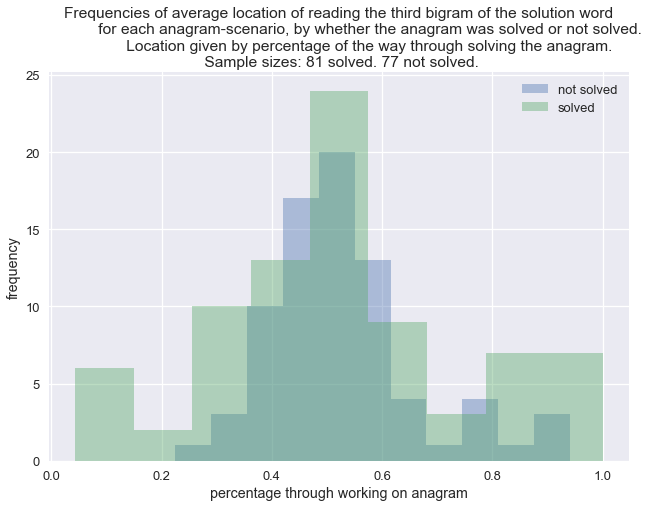

FOR NOT SOLVED
Average 0.5325652280841053
Median 0.5201773835920177
St.Dev 0.13735993400905833
Skewness 1.0550357910020152

Average number of ones: 7.935064935064935

FOR SOLVED
Average 0.5201929784491586
Median 0.4861111111111111
St.Dev 0.22777173618008137
Skewness 0.17842469454726254

Average number of ones: 4.049382716049383


In [97]:
third = give_info_locs(X_loc_third, third_sizes, 'the third')

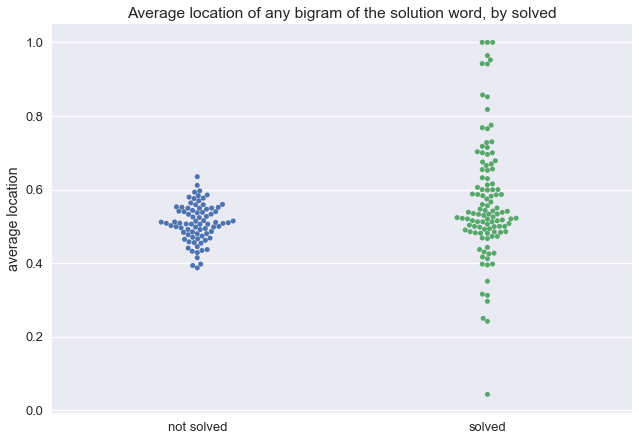

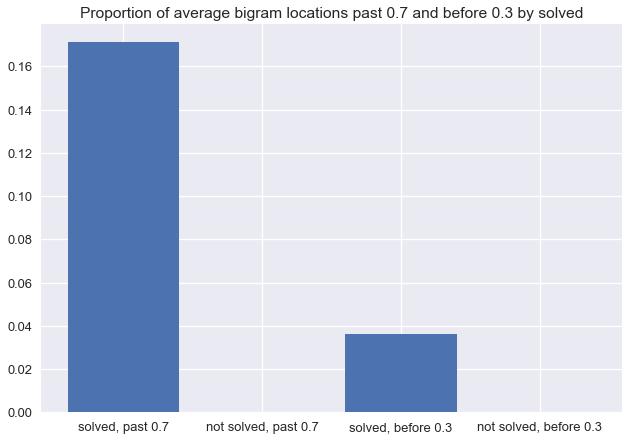

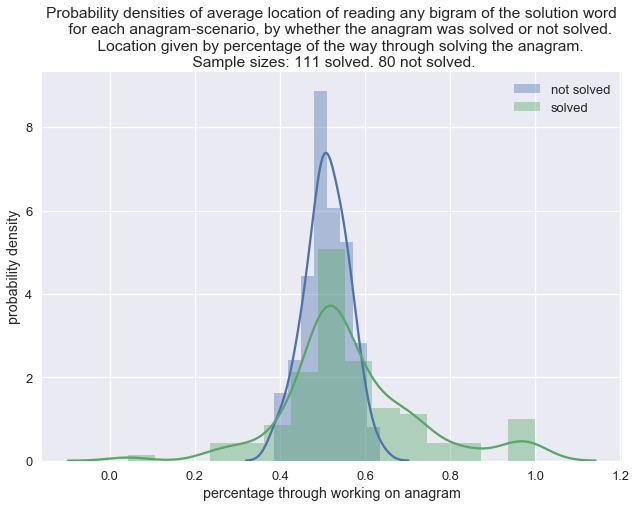

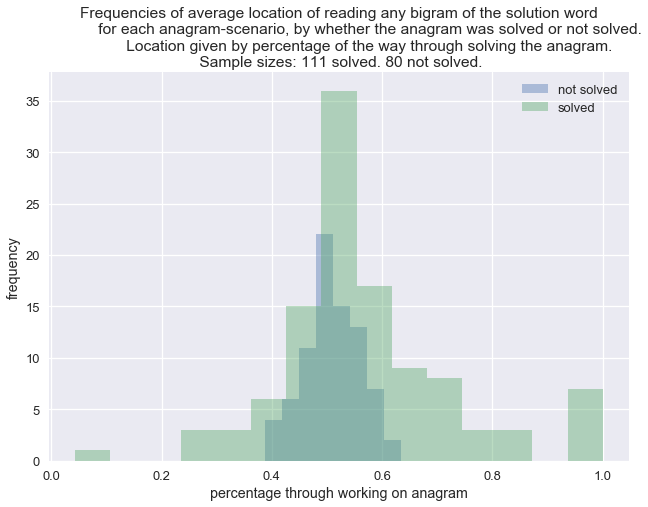

FOR NOT SOLVED
Average 0.5095806198697884
Median 0.508640351583016
St.Dev 0.05112945750899119
Skewness -0.15862351934881952

Average number of ones: 36.325

FOR SOLVED
Average 0.5692575901678627
Median 0.5337014470677837
St.Dev 0.1619648128523294
Skewness 0.5379791124827713

Average number of ones: 11.252252252252251


In [98]:
any_all = give_info_locs(X_loc_all, all_sizes, 'any')

In [99]:
bigram_position = ['any', 'last', 'third', 'second', 'first']
bigram_list = [any_all, last, third, second, first]
def list_order(index, in_list):
    return [element[index] for element in in_list]
    
avg_loc_not_solved = list_order(1, bigram_list)
avg_loc_solved = list_order(0, bigram_list)
sd_loc_not_solved = list_order(3, bigram_list)
sd_loc_solved = list_order(2, bigram_list)
error_solved = list_order(4, bigram_list)
error_not_solved = list_order(5, bigram_list)


### Average locations

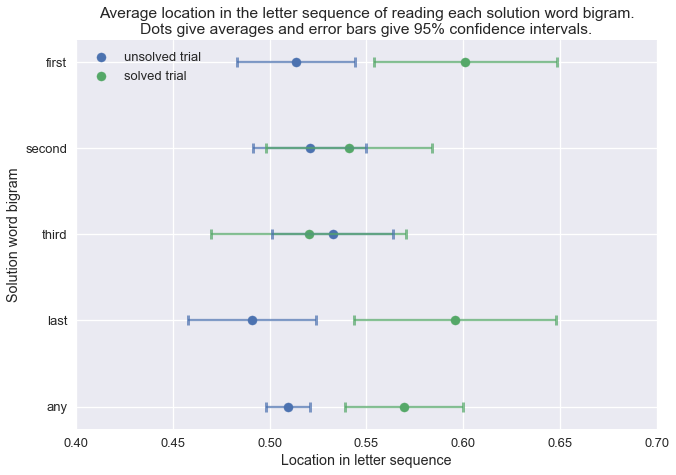

In [124]:
plt.scatter(avg_loc_not_solved, bigram_position)

plt.errorbar(x=avg_loc_not_solved, y=bigram_position, xerr=error_not_solved, linestyle='', \
            alpha=0.7, capsize=5, capthick=3)
plt.scatter(avg_loc_solved, bigram_position)
plt.errorbar(x=avg_loc_solved, y=bigram_position, xerr=error_solved, linestyle='', \
             alpha=0.7, capsize=5, capthick=3)
plt.title('Average location in the letter sequence of reading each solution word bigram.\n' + \
    'Dots give averages and error bars give 95% confidence intervals.')
plt.legend(['unsolved trial', 'solved trial'], loc='upper left')
plt.xlabel('Location in letter sequence')
plt.ylabel('Solution word bigram')
plt.xlim([.4,.7])
plt.savefig('bigram_locations.png', dpi=300)
plt.show()

In [101]:
print(bigram_position)
print('The p values betwen solved and not solved:')
print(list_order(6, bigram_list))

['any', 'last', 'third', 'second', 'first']
The p values betwen solved and not solved:
[0.00019288105107490892, 0.0004610729463023297, 0.33912749816248644, 0.21906931623412146, 0.00117241048731084]


## Time it takes to solve

In [139]:
five_solved_timelengths, six_solved_timelengths, five_not_solved_timelengths, \
six_not_solved_timelengths = by_solved_and_wordlength(X_timelengths)

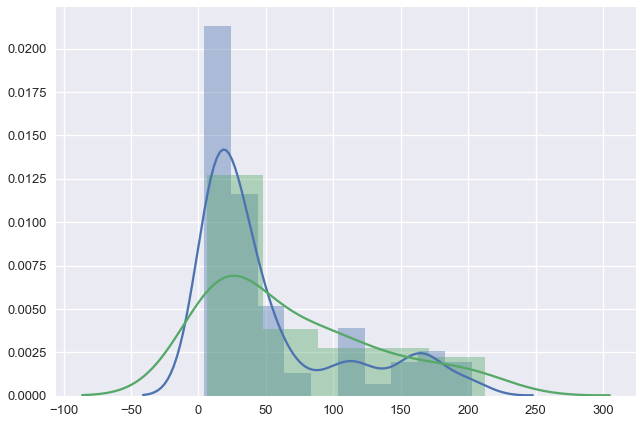

In [31]:
# sns.distplot(not_solved_timelengths)
sns.distplot(five_solved_timelengths)
sns.distplot(six_solved_timelengths)

In [43]:
statJM(five_solved_timelengths)

Average 52.600705128205135
Median 26.8965
St.Dev 55.86764751360244
Skewness 1.3449073352194727


In [44]:
statJM(six_solved_timelengths)

Average 69.9123181818182
Median 44.325
St.Dev 62.18615895233636
Skewness 0.8736904573931882


In [32]:
len(five_solved_timelengths), len(five_not_solved_timelengths)

(78, 12)

In [33]:
# proportion of five letter words that were solved
78 / (78 + 12)

0.8666666666666667

In [34]:
len(six_solved_timelengths), len(six_not_solved_timelengths)

(44, 68)

In [35]:
# proportion of six letter words that were solved 
44 / (44 + 68)

0.39285714285714285

In [37]:
count = 0
for a in five_solved_timelengths:
    if a < 60:
        count += 1

count / len(five_solved_timelengths)

0.7435897435897436

The proportion of 5 letter words would be correct if we stopped participants at 60 seconds

In [56]:
0.7435 * 0.86667

0.6443691450000001

In [40]:
# Number of trials per participant
202 / 27

7.481481481481482

In [142]:
a = by_solved_and_wordlength(X_seqlengths)

In [143]:
for i in a:
    print(len(i))

78
44
12
68


## How does solution knowledge form gradually?

My analysis of the two-letter combinations in the letter sequence data has revealed indications of partial solution knowledge, long before the anagram is actually solved.

A bigram is a two-letter sequence. For example: AB is a bigram. A solution word bigram is a bigram contained in the solution word. For example, if the anagram is OTPNYH, then the solution word is PYTHON. The *first* solution word bigram would be 'PY', the *last* solution word bigram would be 'ON'. For a six letter word, the base rate probability of reading one of the solution word bigrams is one out of thirty. (This is because 6 permute 2 = 30). For example, there is a base rate probability of 1/30 for reading the first two letters of the solution word 'P' then 'Y' in that order. For a five letter word, the base rate probability of reading a solution word bigram is 1/20. <br> <br>
Here, we see that there is a statistically significant divergence between solved and unsolved trials in the probability of readings of the first and last bigrams of the solution word - long before a solution is reached. This discovery has shed light on the gradual formation of solution knowledge during the problem-solving process.


In [155]:
# base rate proportion of solved trials that were 5 letter solution words
78 / (78 + 44)

0.639344262295082

In [299]:
across_titles = ['the first', 'the last', 'any', 'the second', 'the third']

In [300]:
ones_list = [X_ones_first, X_ones_final, X_ones, X_ones_second, X_ones_third]

In [320]:
def split_ones(ones_array, num_splits, min_num_ones=1, seqlength_min=None, seqlength_max=None):
    s_splits5 = list()
    s_splits6 = list()
    ns_splits5 = list()
    ns_splits6 = list()
    s_lengths = list()
    ns_lengths = list()
    for i in range(N):
        go_ahead = True 
        num_ones = np.count_nonzero(ones_array[i] == 1)        
        if num_ones < min_num_ones:
            go_ahead = False
        if seqlength_min != None:
            if X_seqlengths[i] < seqlength_min:
                go_ahead = False
        if seqlength_max != None:
            if X_seqlengths[i] > seqlength_max:
                go_ahead = False
        if go_ahead:
            split = np.array_split(ones_array[i], num_splits)
            if Y[i] == 1:
                if X_wordlengths[i] == 5:
                    s_splits5.append(np.array(split))
                elif X_wordlengths[i] == 6:
                    s_splits6.append(np.array(split))
                s_lengths.append(X_seqlengths[i])
            elif Y[i] == 0:
                if X_wordlengths[i] == 5:
                    ns_splits5.append(np.array(split))
                elif X_wordlengths[i] == 6:
                    ns_splits6.append(np.array(split))
                ns_lengths.append(X_seqlengths[i])
    print('Median solved trial bigram length:', statistics.median(s_lengths) - 1)
    print('Median unsolved trial bigram length:', statistics.median(ns_lengths) - 1)
    print()
    print(round(len(s_splits5) / (len(s_splits5) + len(s_splits6)), 2), \
          'of the solved trials were 5 letter solution words.')
    print()
    return (s_splits5, s_splits6), (ns_splits5, ns_splits6)


def sum_splits(splits_tuple, state=None):
    num_splits = len(splits_tuple[0][0])
    split_vector = list()
    for i in range(num_splits):
        split_vector.append([])
    too_short = 0
    for i in range(len(splits_tuple)):  # for i in range(2)
        if state == None:
            if i == 0:  # if five-letter solution word
                base_rate = 1 / 20
            elif i == 1:  # if six-letter solution word
                base_rate = 1 / 30
        elif state == 'any':  # if any solution word bigram, rather than a specific one
            if i == 0:  # if five-letter solution word
                base_rate = 4 / 20
            elif i == 1:  # if six-letter solution word
                base_rate = 5 / 30
        elif state == 'adjacent':
            if i == 0:  # if five-letter solution word
                base_rate = 1
#                 base_rate = 6 / 18
            elif i == 1:  # if six-letter solution word
                base_rate = 1
#                 base_rate = 5 / 10
        for split_array in splits_tuple[i]:
            go_ahead = True
            for i in range(num_splits):
                if go_ahead:  # check if there's an empty array
                    if len(split_array[i]) == 0:
                        too_short += 1
                        go_ahead = False
            if go_ahead:  # if no empty array, go ahead and add to split_vector
                for i in range(num_splits):
                    prop = sum(split_array[i]) / len(split_array[i])
                    split_vector[i].append(prop / base_rate)
    avgs = [average_list(props) for props in split_vector]
    confs = [conf_error(props) for props in split_vector]
    if too_short != 0:
        print(too_short, 'were too short')
    return avgs, confs, split_vector


def ones_across_sequence(ones_array, num_splits, title_denoter, min_num_ones=1, \
                         seqlength_min=None, seqlength_max=None):
    
    if title_denoter == 'any':
        state = 'any'
    elif title_denoter == 'adjacent':
        state = 'adjacent'
    else:
        state = None
    
    s_splits, ns_splits = split_ones(ones_array, num_splits, min_num_ones=min_num_ones, \
                                     seqlength_min=seqlength_min, \
                                    seqlength_max=seqlength_max)
    
    s_avgs, s_confs, s_split_vector = sum_splits(s_splits, state=state)
    ns_avgs, ns_confs, ns_split_vector = sum_splits(ns_splits, state=state)
    
    
    if num_splits == 5:
        groups = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
    else:
        groups = [str(i) for i in range(1, num_splits + 1)]
    print(len(s_splits[0]) + len(s_splits[1]), 'solved and', len(ns_splits[0]) + \
          len(ns_splits[1]),\
          'unsolved trials had at least ' + str(min_num_ones) + \
          ' instance(s) of ' + title_denoter + ' solution word ' + \
         'bigram in their letter sequence.\n(Trials that did not have at least the minimum ' + \
          'number of instances ' + \
         'of ' + title_denoter + ' solution word bigram were not included.)')
    print()
    
    seqlength_denoter = ''
    if seqlength_min != None:
        seqlength_denoter = 'For trials of at least ' + str(seqlength_min + 1) + ' letters.' # + \
        # ' (Median of 93 for solved and 277 for unsolved trials.)\n'
    plt.title('Likelihood of reading ' + title_denoter + ' solution word bigram ' + \
              'throughout the letter sequence.\n' + seqlength_denoter + \
    'Dots give averages and error bars give 95% confidence intervals.')
    
    if state == 'adjacent':
        plt.title('Likelihood of reading an ' + title_denoter + ' bigram on the screen ' + \
                  'throughout the letter sequence.\n' + seqlength_denoter + \
        'Dots give averages and error bars give 95% confidence intervals.')
    if num_splits == 5:
        plt.xlabel('Quintile of letter sequence')
    else:
        plt.xlabel('Section of letter sequence')
    if state == 'adjacent':
        plt.ylabel('Proportion')
    else:
        plt.ylabel('Ratio to base rate probability')
    plt.scatter(groups, ns_avgs)
    plt.scatter(groups, s_avgs)
    plt.errorbar(x=groups, y=ns_avgs, yerr=ns_confs, linestyle='', \
                alpha=0.7, capsize=5, capthick=3)
    plt.errorbar(x=groups, y=s_avgs, yerr=s_confs, linestyle='', \
                alpha=0.7, capsize=5, capthick=3)
    plt.legend(['unsolved trial', 'solved trial'])
    plt.savefig(title_denoter + '_across.png', dpi=300)
    plt.show()
    
    print('Statistical significance of the difference for each section ' + \
          'of the letter sequence (one-tailed).')
    for i in range(len(s_split_vector)):
        print('Section', [i + 1], '-', \
              ttest_ind(s_split_vector[i], ns_split_vector[i], equal_var=False)[1] / 2)

    s_groups_scatter = list()
    ns_groups_scatter = list()
    s_split_vector_scatter = list()
    ns_split_vector_scatter = list()
    group_nums = list(range(1, len(groups) + 1))
    for i in range(len(groups)):
        for j in range(len(s_split_vector[0])):
            s_groups_scatter.append(group_nums[i])
            s_split_vector_scatter.append(s_split_vector[i][j])
        for j in range(len(ns_split_vector[0])):
            ns_groups_scatter.append(group_nums[i])
            ns_split_vector_scatter.append(ns_split_vector[i][j])
    
    plt.xlabel('Section of the letter sequence')
    
    if state == 'adjacent':
        plt.ylabel('Proportion')
    else:
        plt.ylabel('Ratio to base rate probability')
    plt.scatter(ns_groups_scatter, ns_split_vector_scatter, alpha=0.2)
    plt.scatter(s_groups_scatter, s_split_vector_scatter, alpha=0.2)
    plt.savefig(title_denoter + '_regression.png', dpi=300)
    plt.show()
    
#     for i in range(len(s_split_vector)):
#         print('SOLVED')
#         print(average_list(s_split_vector[i]))
#         print('NOT SOLVED')
#         print(average_list(ns_split_vector[i]))
            
#     print(s_split_vector_scatter)
#     print()
#     print(s_split_vector)
#     print(groups)
    
    return s_splits, ns_splits

In [215]:
# # workstation
# a = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
# b = 

In [220]:
s_total_ones = 0
s_total_sum = 0

for sub in s5:
    for subsub in sub:
        s_total_ones += sum(subsub)
        s_total_sum += len(subsub)
for sub in s6:
    for subsub in sub:
        s_total_ones += sum(subsub)
        s_total_sum += len(subsub)
        
ns_total_ones = 0
ns_total_sum = 0
for sub in ns5:
    for subsub in sub:
        ns_total_ones += sum(subsub)
        ns_total_sum += len(subsub)
for sub in ns6:
    for subsub in sub:
        ns_total_ones += sum(subsub)
        ns_total_sum += len(subsub)

In [221]:
print(s_total_ones / s_total_sum)
print(ns_total_ones / ns_total_sum)


0.027962085308056873
0.02584873031764813


Median solved trial bigram length: 54
Median unsolved trial bigram length: 276.0

0.61 of the solved trials were 5 letter solution words.

95 solved and 80 unsolved trials had at least 0 instance(s) of the first solution word bigram in their letter sequence.
(Trials that did not have at least the minimum number of instances of the first solution word bigram were not included.)



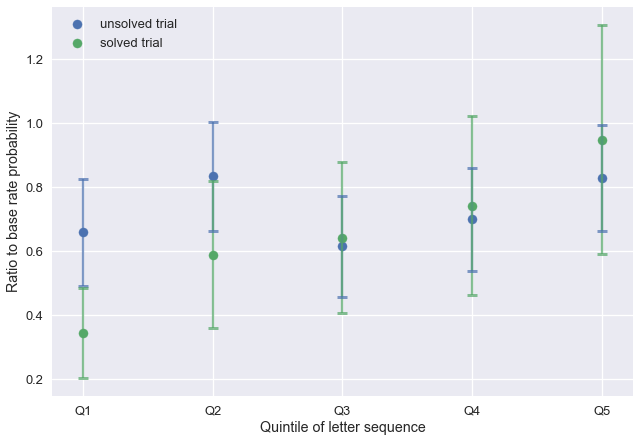

Statistical significance of the difference for each section of the letter sequence (one-tailed).
Section [1] - 0.002428515854651176
Section [2] - 0.044833022633497276
Section [3] - 0.42587731739788043
Section [4] - 0.39701642058105246
Section [5] - 0.27415897894437924


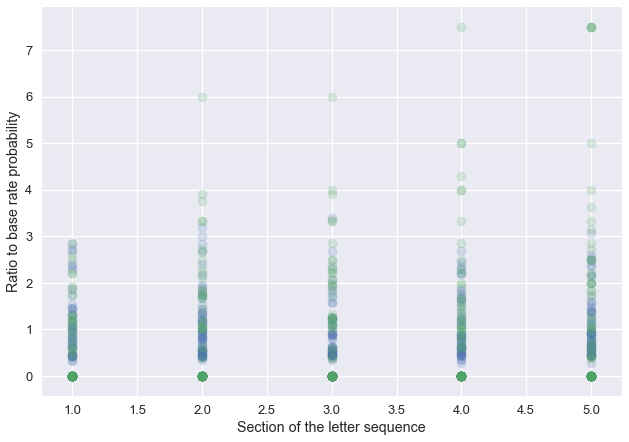

In [318]:
(s5, s6), (ns5, ns6) = ones_across_sequence(ones_list[0], num_splits=5, \
                                         title_denoter=across_titles[0], \
                         min_num_ones=0, seqlength_min=20, seqlength_max=None)

Median solved trial bigram length: 54
Median unsolved trial bigram length: 276.0

0.61 of the solved trials were 5 letter solution words.

95 solved and 80 unsolved trials had at least 0 instance(s) of the first solution word bigram in their letter sequence.
(Trials that did not have at least the minimum number of instances of the first solution word bigram were not included.)



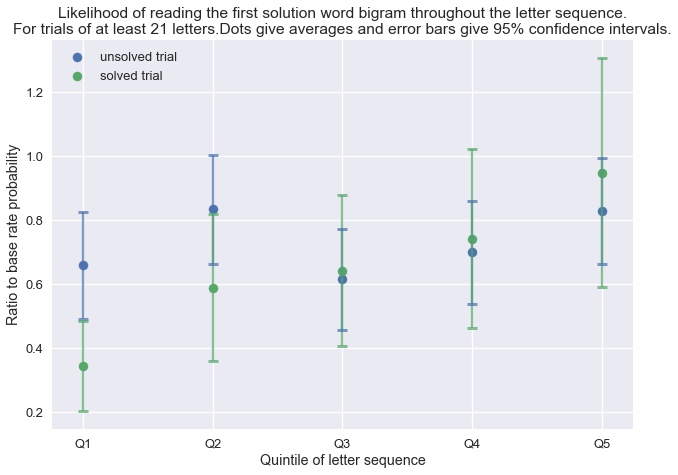

Statistical significance of the difference for each section of the letter sequence (one-tailed).
Section [1] - 0.002428515854651176
Section [2] - 0.044833022633497276
Section [3] - 0.42587731739788043
Section [4] - 0.39701642058105246
Section [5] - 0.27415897894437924


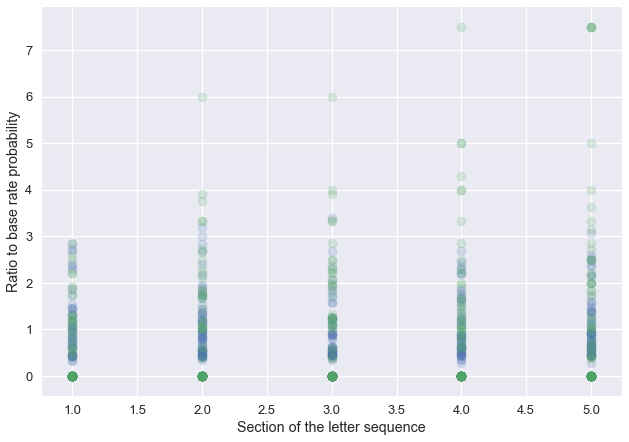

---------------------------------------------------------------------------




Median solved trial bigram length: 54
Median unsolved trial bigram length: 276.0

0.61 of the solved trials were 5 letter solution words.

95 solved and 80 unsolved trials had at least 0 instance(s) of the last solution word bigram in their letter sequence.
(Trials that did not have at least the minimum number of instances of the last solution word bigram were not included.)



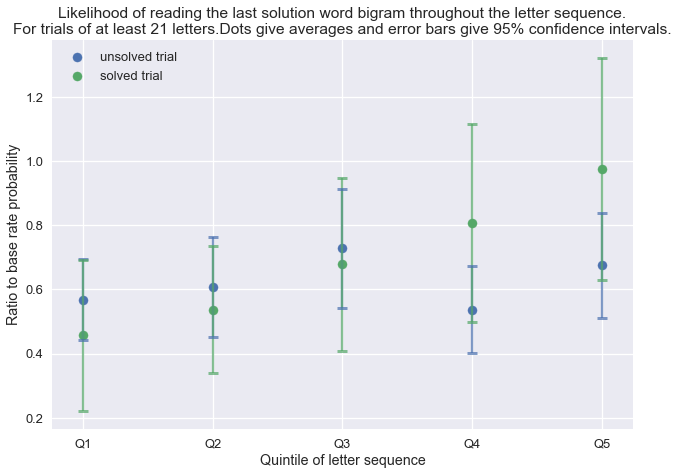

Statistical significance of the difference for each section of the letter sequence (one-tailed).
Section [1] - 0.20539571629459497
Section [2] - 0.291798295556526
Section [3] - 0.38007702857659226
Section [4] - 0.056145643308954586
Section [5] - 0.060484460737492106


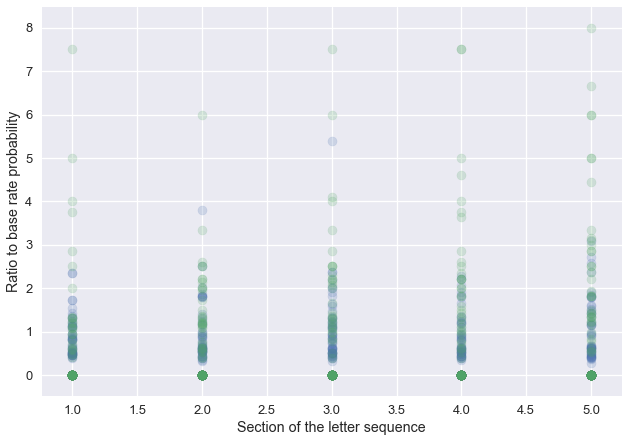

---------------------------------------------------------------------------




Median solved trial bigram length: 54
Median unsolved trial bigram length: 276.0

0.61 of the solved trials were 5 letter solution words.

95 solved and 80 unsolved trials had at least 0 instance(s) of any solution word bigram in their letter sequence.
(Trials that did not have at least the minimum number of instances of any solution word bigram were not included.)



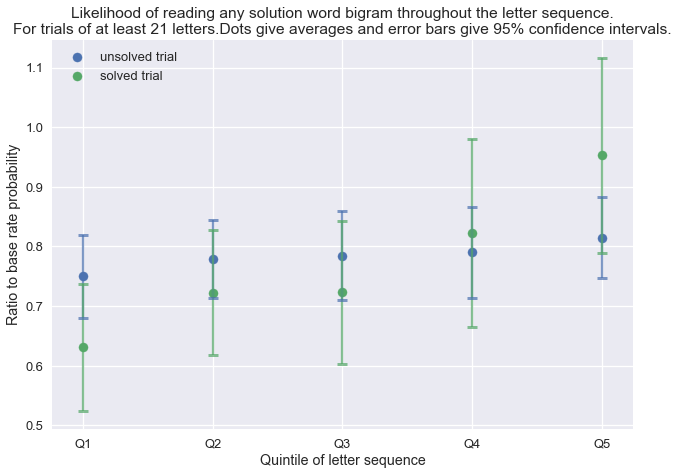

Statistical significance of the difference for each section of the letter sequence (one-tailed).
Section [1] - 0.03338184060394736
Section [2] - 0.18135340703005604
Section [3] - 0.19428741679022987
Section [4] - 0.35394356297397966
Section [5] - 0.06135244273415761


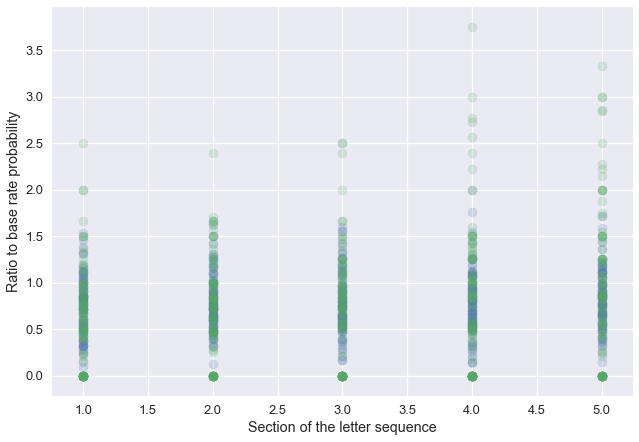

---------------------------------------------------------------------------




Median solved trial bigram length: 54
Median unsolved trial bigram length: 276.0

0.61 of the solved trials were 5 letter solution words.

95 solved and 80 unsolved trials had at least 0 instance(s) of the second solution word bigram in their letter sequence.
(Trials that did not have at least the minimum number of instances of the second solution word bigram were not included.)



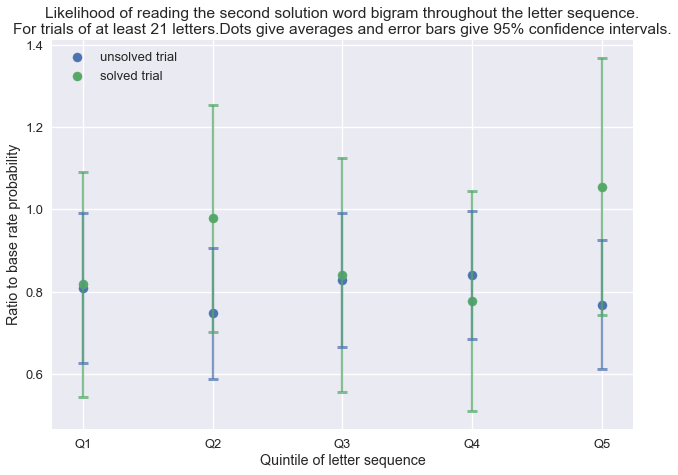

Statistical significance of the difference for each section of the letter sequence (one-tailed).
Section [1] - 0.4761559961112136
Section [2] - 0.07550499396788186
Section [3] - 0.4702758637967589
Section [4] - 0.34008010081247153
Section [5] - 0.052699439045899174


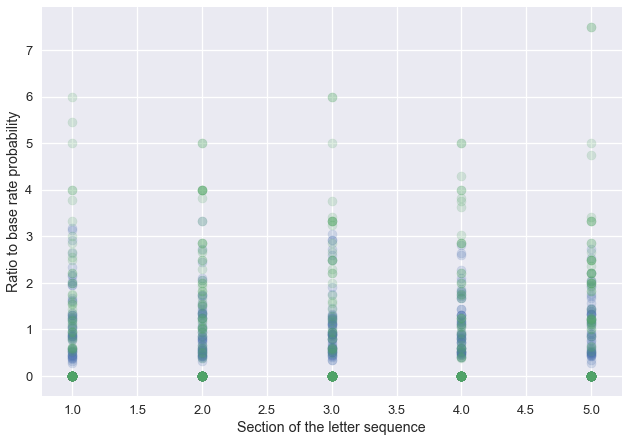

---------------------------------------------------------------------------




Median solved trial bigram length: 54
Median unsolved trial bigram length: 276.0

0.61 of the solved trials were 5 letter solution words.

95 solved and 80 unsolved trials had at least 0 instance(s) of the third solution word bigram in their letter sequence.
(Trials that did not have at least the minimum number of instances of the third solution word bigram were not included.)



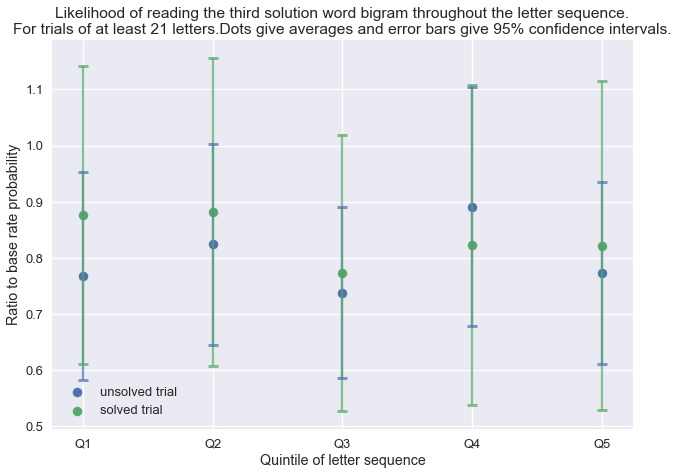

Statistical significance of the difference for each section of the letter sequence (one-tailed).
Section [1] - 0.25317724270894615
Section [2] - 0.36153905210825643
Section [3] - 0.4064438006049873
Section [4] - 0.3530331630911796
Section [5] - 0.38541140426757137


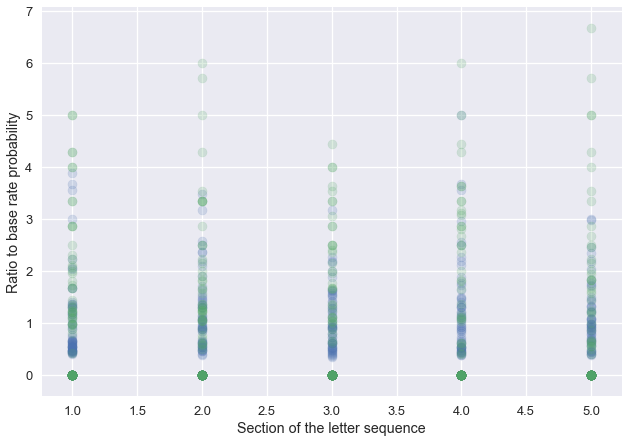

---------------------------------------------------------------------------






In [321]:
  for i in range(len(ones_list)):
    ones_across_sequence(ones_list[i], num_splits=5, \
                                         title_denoter=across_titles[i], \
                         min_num_ones=0, seqlength_min=20, seqlength_max=None)
    
#     ones_across_sequence(ones_list[i], num_splits=10, title_denoter=across_titles[i], \
#                          seqlength_min=25, seqlength_max=None)
    print('---------------------------------------------------------------------------')
    print('\n\n\n')

## Adjacent movements

Median solved trial bigram length: 54
Median unsolved trial bigram length: 276.0

0.61 of the solved trials were 5 letter solution words.

95 solved and 80 unsolved trials had at least 1 instance(s) of adjacent solution word bigram in their letter sequence.
(Trials that did not have at least the minimum number of instances of adjacent solution word bigram were not included.)



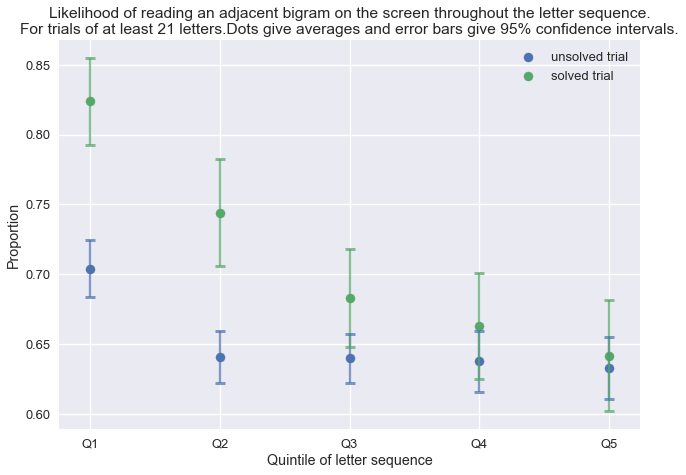

Statistical significance of the difference for each section of the letter sequence (one-tailed).
Section [1] - 8.995130196933031e-10
Section [2] - 2.1556042525524797e-06
Section [3] - 0.015474743837245824
Section [4] - 0.12630268552461105
Section [5] - 0.3509519352577951


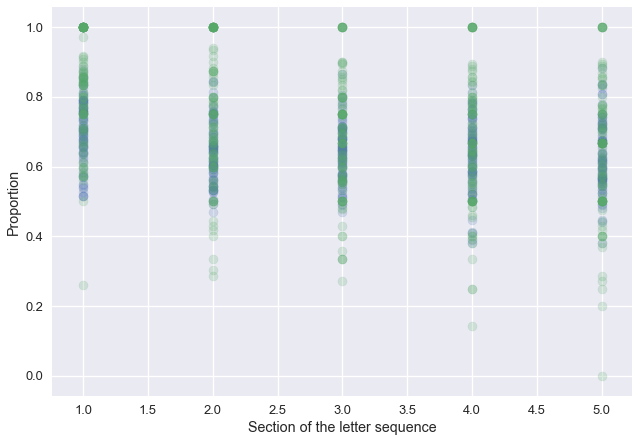

(([array([array([1, 1, 1, 1, 1]), array([1, 1, 1, 0, 0]),
          array([1, 1, 0, 1, 0]), array([1, 1, 0, 0]), array([1, 0, 0, 1])],
         dtype=object),
   array([array([1, 1, 1, 1, 1, 0, 1]), array([0, 1, 1, 1, 1, 0, 1]),
          array([1, 1, 1, 0, 1, 0]), array([0, 1, 0, 1, 1, 1]),
          array([1, 1, 1, 0, 1, 0])], dtype=object),
   array([array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]),
          array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
          array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]),
          array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]),
          array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1])], dtype=object),
   array([array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 0, 0, 1, 1, 1, 1, 1, 0]),
          array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
          1, 0, 1, 1, 1, 1, 1, 1, 1]),
          array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 0, 1, 0, 1, 1]),
   

In [295]:
ones_across_sequence(X_direction_abs_ones, num_splits=5, \
                                         title_denoter='adjacent', \
                         min_num_ones=1, seqlength_min=20, seqlength_max=None)

## Run these cells first to load the functions and the letter sequence database

In [48]:
def conf_interval(a_list):
    return st.t.interval(0.95, len(a_list)-1, \
                                        loc=np.mean(a_list), \
                                        scale=st.sem(a_list))


def conf_error(a_list):
    return conf_interval(a_list)[1] - average_list(a_list)


def by_solved(X_data):
    solved_data = list()
    not_solved_data = list()
    for i in range(N):
        if Y[i] == 1:
            solved_data.append(X_data[i])
        elif Y[i] == 0:
            not_solved_data.append(X_data[i])
    return solved_data, not_solved_data


def by_wordlength(X_data):
    five_data = list()
    six_data = list()
    for i in range(N):
        if X_wordlengths[i] == 5:
            five_data.append(X_data[i])
        elif X_wordlengths[i] == 6:
            six_data.append(X_data[i])
    return five_data, six_data


def by_solved_and_wordlength(X_data):
    five_solved = list()
    six_solved = list()
    five_not_solved = list()
    six_not_solved = list()
    for i in range(N):
        if X_wordlengths[i] == 5:
            if Y[i] == 1:
                five_solved.append(X_data[i])
            elif Y[i] == 0:
                five_not_solved.append(X_data[i])
        elif X_wordlengths[i] == 6:
            if Y[i] == 1:
                six_solved.append(X_data[i])
            elif Y[i] == 0:
                six_not_solved.append(X_data[i])
    return five_solved, six_solved, five_not_solved, six_not_solved


def give_info_locs(locs, sizes, title_denoter, sep=False):
    solved_locs = list()
    not_solved_locs = list()
    solved_sizes = list()
    not_solved_sizes = list()

    for i in range(len(locs)):
        if sizes[i] != 0:
            if Y[i] == 1:
                solved_locs.append(locs[i])
                solved_sizes.append(sizes[i])
            else:
                not_solved_locs.append(locs[i])
                not_solved_sizes.append(sizes[i])

    plt.title('Average location of ' + title_denoter + ' bigram of the solution word, by solved')
    plt.ylabel('average location')
    sns.swarmplot(['solved' if value == 1 else 'not solved' for value in Y], locs)
    plt.show()

    late = 0.7
    early = 1 - late

    late_solved_count = 0
    early_solved_count = 0
    for loc in solved_locs:
        if loc > late:
            late_solved_count += 1
        elif loc < early:
            early_solved_count += 1
    late_unsolved_count = 0
    early_unsolved_count = 0
    for loc in not_solved_locs:
        if loc > late:
            late_unsolved_count += 1
        elif loc < early:
            early_unsolved_count += 1

    late_solved_prop = late_solved_count / len(solved_locs)
    late_unsolved_prop = late_unsolved_count / len(not_solved_locs)
    early_solved_prop = early_solved_count / len(solved_locs)
    early_unsolved_prop = early_unsolved_count / len(not_solved_locs)

    late = round(late, 2)
    early = round(early, 2)
    plt.title('Proportion of average bigram locations past ' + \
              str(late) + ' and before ' + str(early) + ' by solved')

    plt.bar(['solved, past ' + str(late), 'not solved, past ' + str(late), \
             'solved, before ' + str(early), 'not solved, before ' + str(early)],
            [late_solved_prop, late_unsolved_prop, early_solved_prop, early_unsolved_prop])

    plt.show()

    sns.distplot(not_solved_locs, label='not solved', kde=True)
    sns.distplot(solved_locs, label='solved', kde=True)
    plt.title('Probability densities of average location of reading ' + title_denoter + \
              ' bigram of the solution word\n\
    for each anagram-scenario, by whether the anagram was solved or not solved.\n\
    Location given by percentage of the way through solving the anagram.\n Sample sizes: ' + \
              str(len(solved_locs)) + ' solved. ' + str(len(not_solved_locs)) + \
              ' not solved.')
    plt.ylabel('probability density')
    plt.xlabel('percentage through working on anagram')
    plt.legend()
    plt.show()

    sns.distplot(not_solved_locs, label='not solved', kde=False, norm_hist=False)
    sns.distplot(solved_locs, label='solved', kde=False, norm_hist=False)
    plt.title('Frequencies of average location of reading ' + title_denoter + ' bigram of' + \
              ' the solution word\n\
              for each anagram-scenario, by whether the anagram was solved or not solved.\n\
              Location given by percentage of the way through solving the anagram.\n Sample sizes: ' + \
              str(len(solved_locs)) + ' solved. ' + str(len(not_solved_locs)) + \
              ' not solved.')
    plt.ylabel('frequency')
    plt.xlabel('percentage through working on anagram')
    plt.legend()
    plt.show()

    print('FOR NOT SOLVED')
    statJM(not_solved_locs)
    print()
    print('Average number of ones:', sum(not_solved_sizes) / len(not_solved_sizes))
    print()
    print('FOR SOLVED')
    statJM(solved_locs)
    print()
    print('Average number of ones:', sum(solved_sizes) / len(solved_sizes))

    solved_interval = st.t.interval(0.95, len(solved_locs) - 1, loc=np.mean(solved_locs), \
                                    scale=st.sem(solved_locs))
    not_solved_interval = st.t.interval(0.95, len(not_solved_locs) - 1, \
                                        loc=np.mean(not_solved_locs), \
                                        scale=st.sem(not_solved_locs))

    solved_err = solved_interval[1] - average_list(solved_locs)
    not_solved_err = not_solved_interval[1] - average_list(not_solved_locs)

    return average_list(solved_locs), average_list(not_solved_locs), \
           statistics.stdev(solved_locs), statistics.stdev(not_solved_locs), solved_err, not_solved_err, \
           ttest_ind(solved_locs, not_solved_locs, equal_var=False)[1] / 2, solved_locs, not_solved_locs


def check_ones(ones_list):
    for i in range(N):
        if X_wordlengths[i] == 5:
            if len(ones_list[i]) > 4:
                ones_list[i] = ones_list[i][:-4]
        elif X_wordlengths[i] == 6:
            if len(ones_list[i]) > 5:
                ones_list[i] = ones_list[i][:-5]
    return ones_list


def outcome_list_to_prob_mass(outcome_list, proportion=1):
    x = []
    y = []
    length = len(outcome_list)
    unique_outcomes = list(set(outcome_list))
    for result in unique_outcomes:
        num_counts = outcome_list.count(result)
        x.append(result)
        y.append(num_counts / length)
    if proportion != 1:
        y = [value * proportion for value in y]
    return x, y


def plot_prob_mass(x, y, title, xlabel, ylabel, save=False, default_x_ticks=False, no_labels=False):
    plt.style.use('seaborn')
    plt.style.use('seaborn-talk')
    if default_x_ticks == False:
        plt.xticks(x)
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    if no_labels == False:
        for a, b in zip(x, y):
            if b != 0:
                plt.text(a, b, "{:0.1%}".format(b), ha='center', va='bottom', size=11)
    if save == True:
        plt.savefig(title + '.png', dpi=300)
    plt.show()


def histJM(outcome_list, title="", xlabel="", ylabel="proportion"):
    x, y = outcome_list_to_prob_mass(outcome_list)
    plot_prob_mass(x, y, title=title, \
                   xlabel=xlabel, ylabel=ylabel)


def average_list(outcome_list):
    return sum(outcome_list) / len(outcome_list)


def statJM(outcome_list):
    print('Average', average_list(outcome_list))
    print('Median', statistics.median(outcome_list))
    print('St.Dev', statistics.stdev(outcome_list))
    print('Skewness', skew(outcome_list))

In [7]:
d = shelve.open('seq_data')

Y = d['Y']

X_words = d['X_words']
X_wordlengths = d['X_wordlengths']
X_par = d['X_par']
X_seqlengths = d['X_seqlengths']
X_seqlengths = np.array([int(value) for value in X_seqlengths])
X_timelengths = d['X_timelengths']
X_propvowel = d['X_propvowel']
X_loc_all = d['X_loc_all']

X_letterseq = d['X_letterseq']
X_vowels = d['X_vowels']
X_order = d['X_order']
X_position = d['X_position']

X_loc_first = d['X_loc_first']
X_loc_second = d['X_loc_second']
X_loc_third = d['X_loc_third']
X_loc_fourth = d['X_loc_fourth']
X_loc_final = d['X_loc_final']

X_ones = d['X_ones']
X_ones_first = d['X_ones_first']
X_ones_second = d['X_ones_second']
X_ones_third = d['X_ones_third']
X_ones_fourth = d['X_ones_fourth']
X_ones_final = d['X_ones_final']

X_bigrams = d['X_bigrams']
X_trigrams = d['X_trigrams']
X_fourgrams = d['X_fourgrams']
X_fivegrams = d['X_fivegrams']

first_sizes = d['first_sizes']
second_sizes = d['second_sizes']
third_sizes = d['third_sizes']
fourth_sizes = d['fourth_sizes']
final_sizes = d['final_sizes']
all_sizes = d['all_sizes']

total_word_list = d['total_word_list']
words_prop_values = d['words_prop_values']

N = len(Y)

d.close()

In [ ]:
# MAKE X_direction
X_direction = list()
for i in range(N):
    sequence_direction = list()
    length = X_seqlengths[i]
    for j in range(length - 1):
        v = X_position[i][j + 1] - X_position[i][j]
        if X_wordlengths[i] == 6:
            if abs(v) > 3:
                v = int((6 - abs(v)) * -1 * (v / abs(v)))
            elif v == -3:
                v = 3
            sequence_direction.append(v)
        elif X_wordlengths[i] == 5:
            if abs(v) > 2:
                v = int((5 - abs(v)) * -1 * (v / abs(v)))
            sequence_direction.append(v)
        
    X_direction.append(np.array(sequence_direction))
X_direction = np.array(X_direction)


# MAKE X_direction_abs
X_direction_abs = list()
for i in range(N):
    abs_list = [abs(value) for value in X_direction[i]]
    X_direction_abs.append(np.array(abs_list))
        
X_direction_abs = np.array(X_direction_abs)


# MAKE X_direction_abs_ones
X_direction_abs_ones = list()
for i in range(N):    
    dir_abs = [1 if value == 1 else 0 for value in X_direction_abs[i]]
    X_direction_abs_ones.append(np.array(dir_abs))
X_direction_abs_ones = np.array(X_direction_abs_ones)